In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data_path = '/project2/kribelba_1515/data/EXTRA_seq/2024_data/endoMPRA_lib5p4/mapping_r2_to_BC_5p4_plDNA_lib_total_BCcount_55bp_from_R2end_ofhublib4p75tab_unique_BC_read_mappings_only_plus_inferred_TFsyntax_2025_04_04.csv'
mapping = pd.read_csv(data_path, sep=',')
mapping = mapping[['BC', 'Freq', 'inferred_name']]
mapping = mapping.rename(columns={'inferred_name': 'Enhancer'})

In [3]:
mapping

,BC,Freq,Enhancer
0,AAAAAAAAGCCC,42,PU1_PU1_PU1_1
1,AAAAAAACCCTA,1,FOXO_MYC_FOXO_1
2,AAAAAAAGACGG,1,MYC_MYC_MYC_3
3,AAAAAAAGCTCC,17,RUNX3_MYC_RUNX3_3
4,AAAAAAAGGTAA,1,MEF2_CTCF_1
...,...,...,...
359578,TTTTTTTTGCTA,1,CTCF_IRF_CTCF_2
359579,TTTTTTTTNTTT,1,MYC_RUNX3_MYC_2
359580,TTTTTTTTTCAT,1,RUNX3_RUNX3_RUNX3_3
359581,TTTTTTTTTTGA,1,NFKB_RUNX3_1


In [8]:
valid_chars = {'A', 'T', 'G', 'C'}

def clean_mapping(df):
 df_cleaned = df.dropna(subset=['BC'])  # remove any NaN barcodes
 df_cleaned = df_cleaned[
    (df_cleaned['BC'].str.len() == 12) & 
    (df_cleaned['BC'].apply(lambda x: set(x).issubset(valid_chars)))]
 return df_cleaned

In [9]:
mapping = clean_mapping(mapping)
mapping

,BC,Freq,Enhancer
0,AAAAAAAAGCCC,42,PU1_PU1_PU1_1
1,AAAAAAACCCTA,1,FOXO_MYC_FOXO_1
2,AAAAAAAGACGG,1,MYC_MYC_MYC_3
3,AAAAAAAGCTCC,17,RUNX3_MYC_RUNX3_3
4,AAAAAAAGGTAA,1,MEF2_CTCF_1
...,...,...,...
359577,TTTTTTTTCGAA,1,PU1_RUNX3_PU1_3
359578,TTTTTTTTGCTA,1,CTCF_IRF_CTCF_2
359580,TTTTTTTTTCAT,1,RUNX3_RUNX3_RUNX3_3
359581,TTTTTTTTTTGA,1,NFKB_RUNX3_1


In [11]:
print(mapping['BC'].nunique())
# there is a total of 358729 unique barcodes in the mapping file

358729


In [12]:
mapping.to_csv('mapping_filtered_upstream.tsv', sep='\t', index=False)

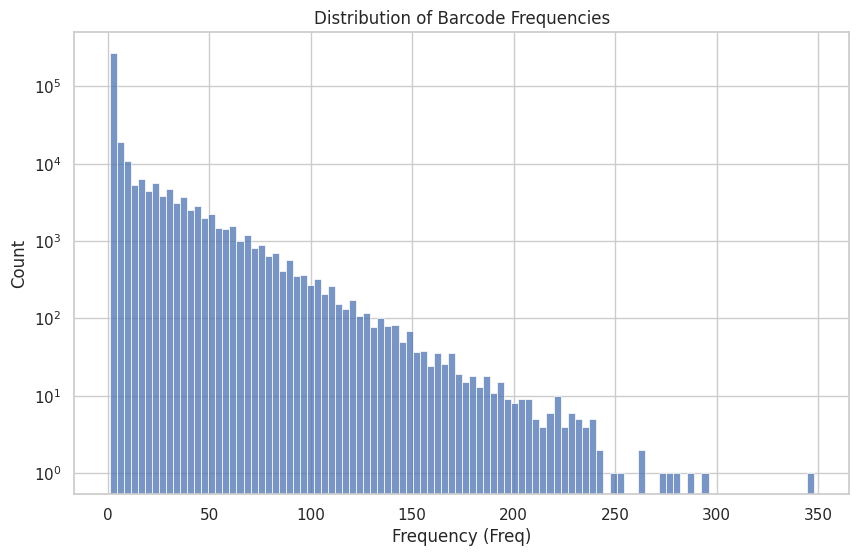

In [13]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(mapping["Freq"], bins=100, kde=False)
plt.xlabel("Frequency (Freq)")
plt.ylabel("Count")
plt.title("Distribution of Barcode Frequencies")
plt.yscale("log")
plt.show()

/tmp/SLURM_1683410/ipykernel_1554849/1062732355.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=enhancer_counts[:20].values, y=enhancer_counts[:20].index, palette="viridis")


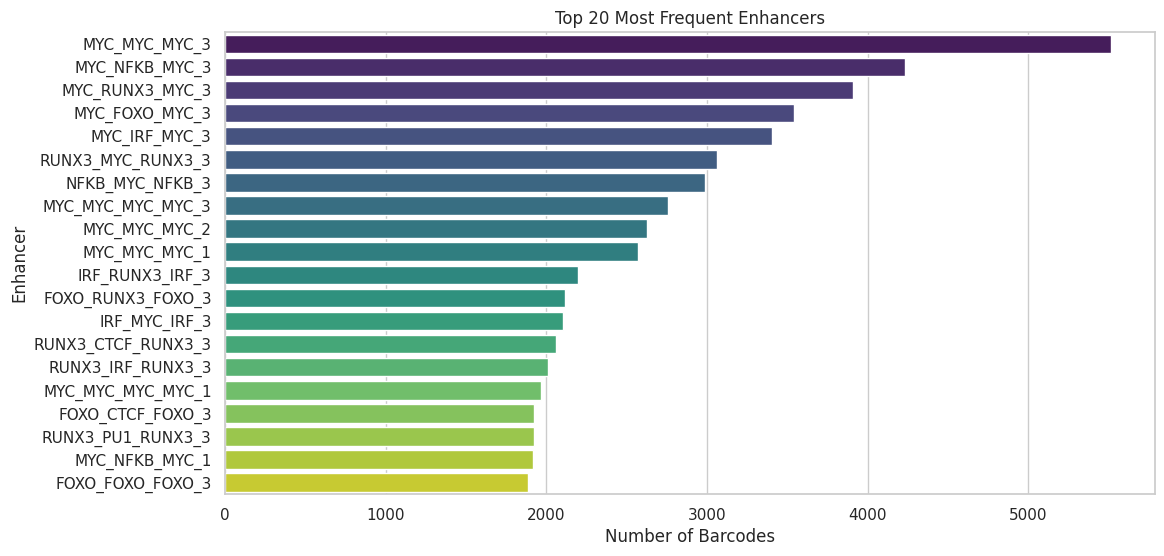

In [14]:
# checking the distribution of the top 20 enhancers
enhancer_counts = mapping["Enhancer"].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=enhancer_counts[:20].values, y=enhancer_counts[:20].index, palette="viridis")
plt.xlabel("Number of Barcodes")
plt.ylabel("Enhancer")
plt.title("Top 20 Most Frequent Enhancers")
plt.show()

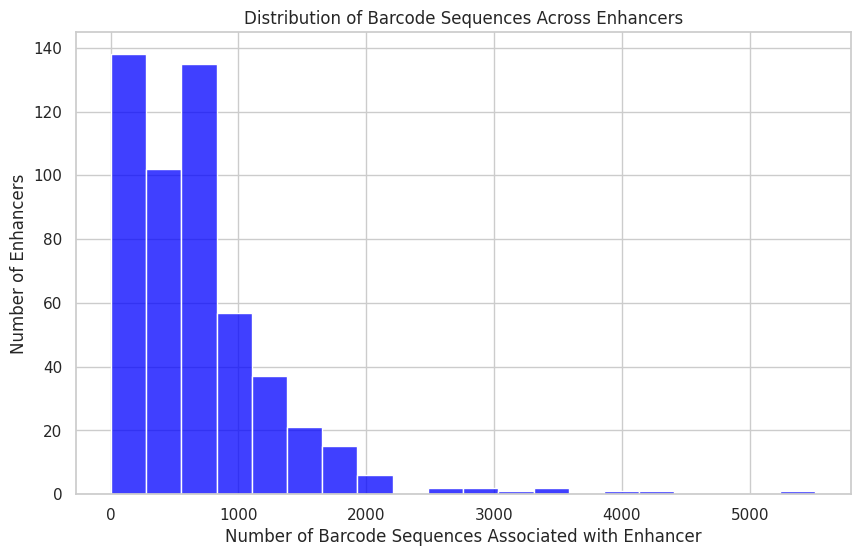

In [15]:
enhancer_counts = mapping['Enhancer'].value_counts()

plt.figure(figsize=(10, 6))
sns.histplot(enhancer_counts.values, bins=20, color='blue', kde=False)

# Set labels and title
plt.xlabel('Number of Barcode Sequences Associated with Enhancer')
plt.ylabel('Number of Enhancers')
plt.title('Distribution of Barcode Sequences Across Enhancers')

plt.xticks()
plt.yticks()
plt.show()
